In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import bartz
from stochtree import BARTModel
from bart_playground import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import arviz as az
import time

INFO:arviz.preview:arviz_base not installed
INFO:arviz.preview:arviz_stats not installed
INFO:arviz.preview:arviz_plots not installed


In [4]:
import numpy as np

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features
y = abalone.data.targets

#X = pd.get_dummies(X, columns=['Sex'])
X = X.drop(columns=['Sex'])

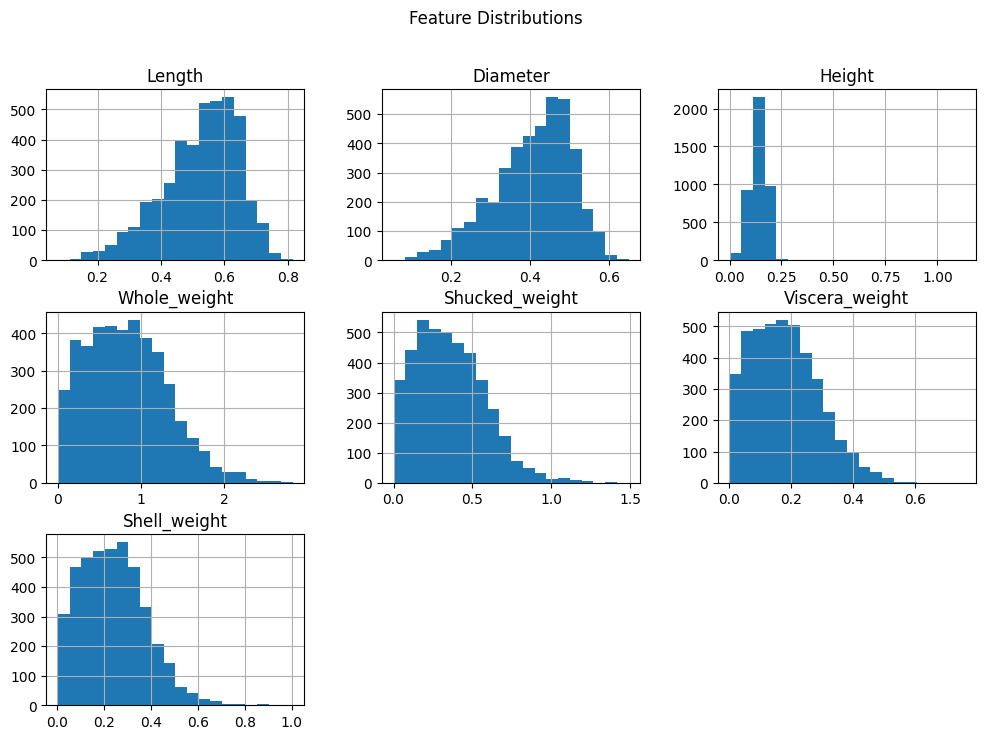

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

X.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

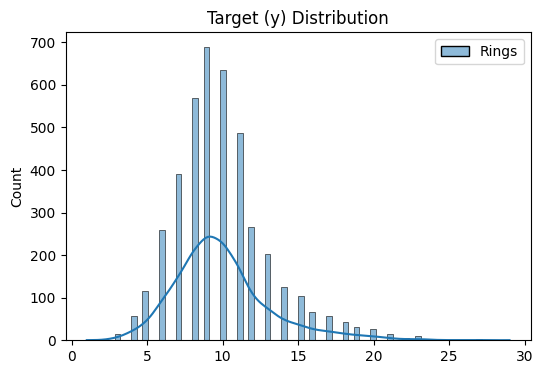

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title("Target (y) Distribution")
plt.show()

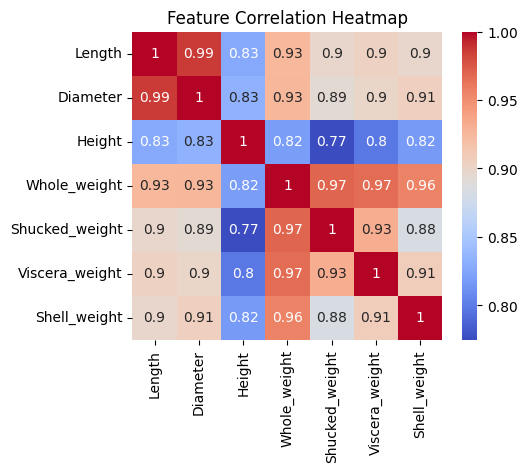

In [7]:
plt.figure(figsize=(5, 4))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
X = X.values.astype(float)
y = np.array(y).astype(np.float32).reshape(-1)

In [9]:
import comparison
import pandas as pd

rhat_df = comparison.gelman_rubin_r_compare(X, y, n_runs=5, n_chains=4, ndpost=1000, nskip=1000, n_trees=100, n_jobs=5)
mean_row = pd.DataFrame([rhat_df.mean()], index=["mean"])
std_row = pd.DataFrame([rhat_df.std()], index=["std"])
rhat_df_with_stats = pd.concat([rhat_df, mean_row, std_row])
print("Gelman-Rubin R̂ comparison matrix:")
print(rhat_df_with_stats)

Gelman-Rubin R̂ comparison matrix:
      MultiBART_Rhat_Sigma2  DefaultBART_Rhat_Sigma2  MultiBART_Rhat_RMSE  \
0                  1.084964                 1.084424             1.160657   
1                  1.084832                 1.052268             1.195830   
2                  1.030894                 1.121633             1.064071   
3                  1.011666                 1.096341             1.235349   
4                  1.024772                 1.065918             1.255471   
mean               1.047426                 1.084117             1.182276   
std                0.034906                 0.026938             0.075495   

      DefaultBART_Rhat_RMSE  
0                  1.111170  
1                  1.172634  
2                  1.215420  
3                  1.227008  
4                  1.278941  
mean               1.201035  
std                0.062915  


In [10]:
rhat_df.to_csv("results/real1_Abalone_rhat.csv", index=False)

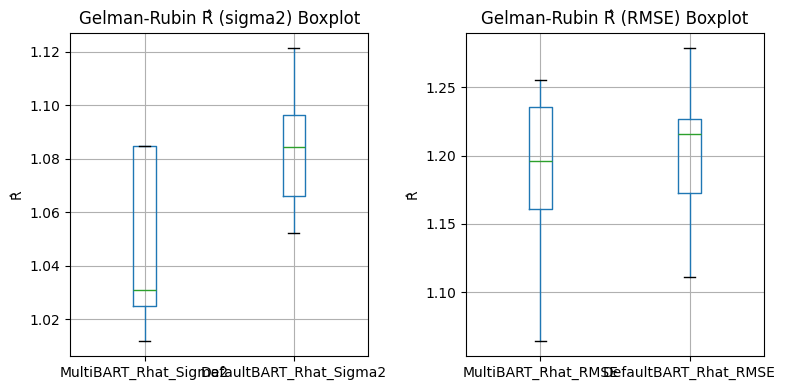

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sigma2 boxplot
rhat_df[["MultiBART_Rhat_Sigma2", "DefaultBART_Rhat_Sigma2"]].boxplot(ax=axes[0])
axes[0].set_title("Gelman-Rubin R̂ (sigma2) Boxplot")
axes[0].set_ylabel("R̂")

# rmse boxplot
rhat_df[["MultiBART_Rhat_RMSE", "DefaultBART_Rhat_RMSE"]].boxplot(ax=axes[1])
axes[1].set_title("Gelman-Rubin R̂ (RMSE) Boxplot")
axes[1].set_ylabel("R̂")

plt.tight_layout()
plt.show()

INFO:2025-10-28 17:34:10,061:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-28 17:34:10,061:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-28 17:34:14,884:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to op

test_mse:
      bart_mtmh      bart       btz        rf       xgb
0      4.863799  4.988469  4.904281  4.791655  5.722874
1      4.764024  4.739308  4.814518  4.574730  5.348410
2      5.433669  5.375862  5.341948  5.399027  5.810473
3      4.408736  4.597135  4.514893  4.645710  5.385919
4      4.321426  4.429484  4.469931  4.558238  5.046336
5      5.091168  5.077842  5.142655  5.052298  5.874977
6      5.265690  5.149329  4.866877  4.946810  5.660102
7      5.264069  5.274694  5.287502  5.139162  5.571136
8      4.992699  5.007960  4.828932  4.887725  5.738235
9      5.151351  5.253102  5.243740  5.280333  5.807626
mean   4.955663  4.989319  4.941528  4.927569  5.596609
std    0.368827  0.309830  0.307681  0.292084  0.261880



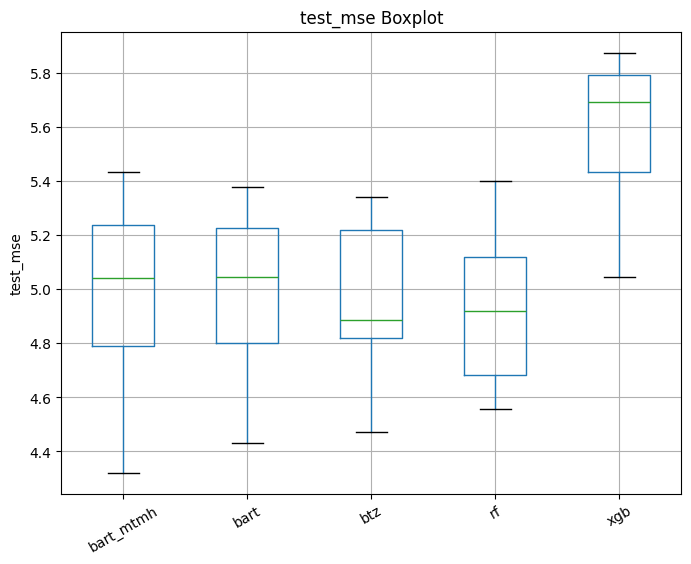

train_mse:
      bart_mtmh      bart       btz        rf       xgb
0      3.744332  3.793018  3.919933  0.679427  0.542755
1      3.773477  3.927932  3.998078  0.683244  0.606606
2      3.572738  3.677879  3.762386  0.639765  0.543232
3      3.723961  3.804649  3.964029  0.677036  0.545936
4      3.884463  3.942961  4.066865  0.681703  0.621954
5      3.592496  3.704741  3.831448  0.647193  0.533894
6      3.545158  3.747453  3.914978  0.680122  0.566025
7      3.582207  3.657678  3.772047  0.656752  0.540149
8      3.726669  3.784809  3.909686  0.674107  0.535856
9      3.518539  3.653876  3.734415  0.667631  0.549909
mean   3.666404  3.769500  3.887386  0.668698  0.558632
std    0.120149  0.103365  0.109603  0.015522  0.030849



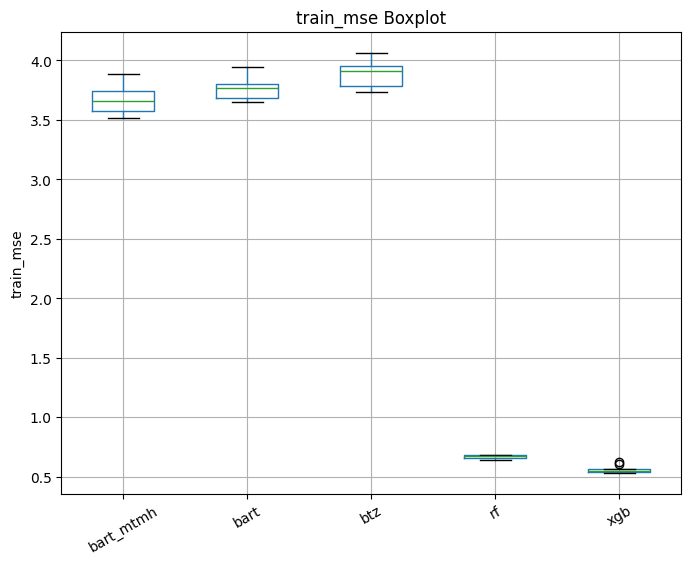

pi_length:
      bart_mtmh      bart       btz
0      8.127801  8.082582  8.329013
1      8.143214  8.213273  8.300624
2      7.955245  7.958014  8.187305
3      8.129287  8.108954  8.278218
4      8.320733  8.293825  8.411736
5      7.991131  7.985721  8.260743
6      7.917918  8.028397  8.304968
7      8.019104  7.955359  8.236687
8      8.030886  8.048337  8.309824
9      7.986020  7.960645  8.153925
mean   8.062134  8.063511  8.277304
std    0.119329  0.114903  0.073302



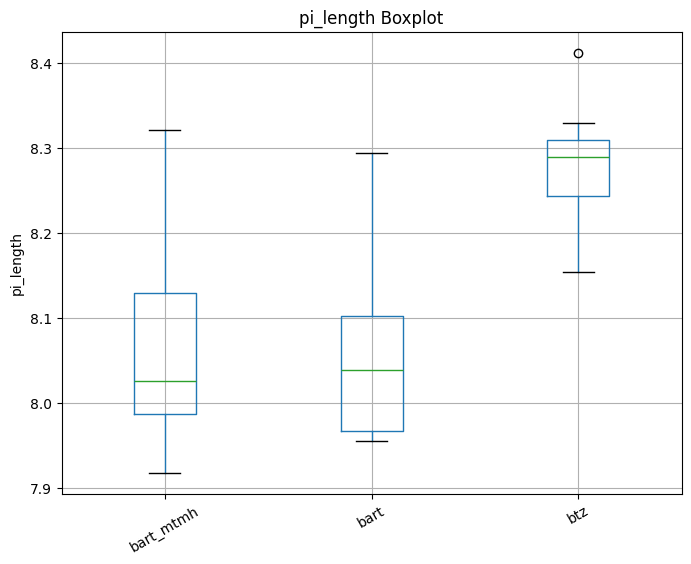

coverage:
      bart_mtmh      bart       btz
0      0.933971  0.933971  0.945455
1      0.931100  0.931100  0.933971
2      0.925359  0.925359  0.925359
3      0.939713  0.931100  0.943541
4      0.945455  0.938756  0.940670
5      0.929187  0.924402  0.926316
6      0.908134  0.913876  0.934928
7      0.924402  0.915789  0.924402
8      0.933014  0.940670  0.937799
9      0.929187  0.928230  0.930144
mean   0.929952  0.928325  0.934258
std    0.009953  0.008810  0.007616



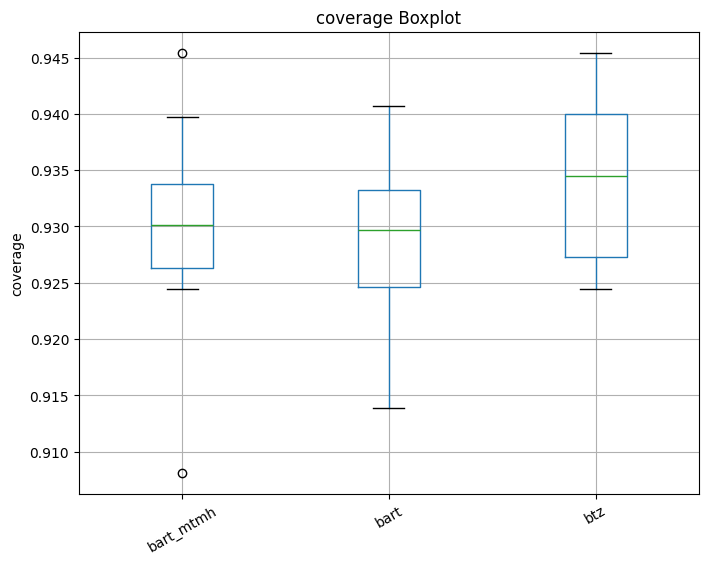

train_time:
       bart_mtmh       bart        btz        rf       xgb
0     172.298860  25.623261  37.778643  2.147846  0.160157
1     166.301445  26.333281  38.541574  2.170042  0.253026
2     167.070790  25.572150  38.633619  2.115196  0.202455
3     184.225368  30.356874  38.735241  2.117455  0.154091
4     171.541507  26.055624  37.747327  2.133019  0.158812
5     170.370980  25.446092  39.913248  2.133705  0.197757
6     173.364029  25.073517  39.728502  2.039678  0.148679
7     178.791212  26.314088  39.529379  2.133484  0.151267
8     180.028040  25.208884  39.614429  2.030583  0.148302
9     180.613917  27.022295  40.096954  2.092678  0.153306
mean  174.460615  26.300607  39.031891  2.111369  0.172785
std     6.103436   1.543900   0.862234  0.045089  0.034431



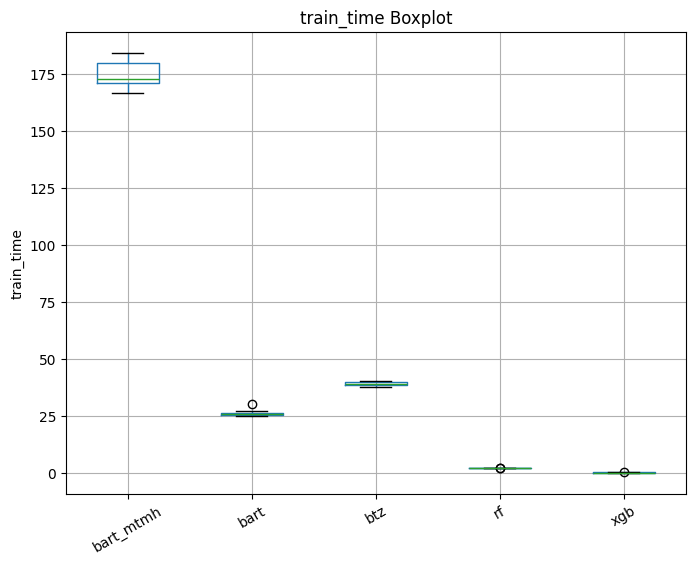

In [12]:
import matplotlib.pyplot as plt
import comparison
import pandas as pd

mse_results = comparison.bart_mse_comparison(X, y, n_runs=10, n_skip=1000, n_post=1000, n_trees=100, n_jobs=5)
for k, v in mse_results.items():
    mean_row = pd.DataFrame([v.mean()], index=["mean"])
    std_row = pd.DataFrame([v.std()], index=["std"])
    v_with_stats = pd.concat([v, mean_row, std_row])
    print(f"{k}:\n{v_with_stats}\n")
    
    plt.figure(figsize=(8, 6))
    v.boxplot()
    plt.title(f"{k} Boxplot")
    plt.ylabel(k)
    plt.xticks(rotation=30)
    plt.show()

In [13]:
for k, v in mse_results.items():
    csv_name = f"results/real1_Abalone_{k}.csv"
    v.to_csv(csv_name, index=False)

## Multi-tries

In [ ]:
from multi_tries import multi_tries_performance
import pandas as pd

csv_path = "results/real1_Abalone_tries.csv"
existing_df = None

if os.path.exists(csv_path):
    existing_df = pd.read_csv(csv_path)

df = multi_tries_performance(
    X, y,
    multi_tries_list=[1, 5, 10, 50, 100],
    n_runs=5, n_chains=4,
    ndpost=1000, nskip=1000, n_trees=100, n_jobs=5
)

if existing_df is not None:
    df = pd.concat([existing_df, df], ignore_index=True)
    df = df.sort_values(by='multi_tries', ascending=True).reset_index(drop=True)

df.to_csv("results/real1_Abalone_tries.csv", index=False)

In [ ]:
import pandas as pd
df = pd.read_csv("results/real1_Abalone_tries.csv")
print(df)